**Install Dependencies**

In [ ]:
!pip3 install torch torchvision torchaudio

In [ ]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.6924, 0.0867, 0.4385],
        [0.2835, 0.4493, 0.3102],
        [0.0368, 0.9607, 0.9761],
        [0.1873, 0.1359, 0.3561],
        [0.4343, 0.6132, 0.4097]])


In [ ]:
!git clone https://github.com/ultralytics/yolov5

**Load Model**

In [2]:
import torch 
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\LENOVO/.cache\torch\hub\ultralytics_yolov5_master
requirements: YOLOv5 requirements "tqdm>=4.64.0" "psutil" not found, attempting AutoUpdate...
requirements:  AutoUpdate skipped (offline)
YOLOv5  2022-11-3 Python-3.7.7 torch-1.7.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [4]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

**Make Detections**

In [11]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [12]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 2811.1ms pre-process, 2230.3ms inference, 588.8ms NMS per image at shape (1, 3, 384, 640)


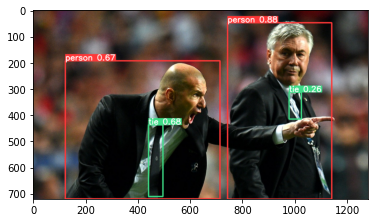

In [13]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [14]:
results.xyxy

[tensor([[7.43290e+02, 4.83437e+01, 1.14176e+03, 7.20000e+02, 8.79861e-01, 0.00000e+00],
         [4.41990e+02, 4.37337e+02, 4.96585e+02, 7.10036e+02, 6.75119e-01, 2.70000e+01],
         [1.23051e+02, 1.93238e+02, 7.14691e+02, 7.19771e+02, 6.66693e-01, 0.00000e+00],
         [9.78990e+02, 3.13579e+02, 1.02530e+03, 4.15526e+02, 2.61517e-01, 2.70000e+01]])]

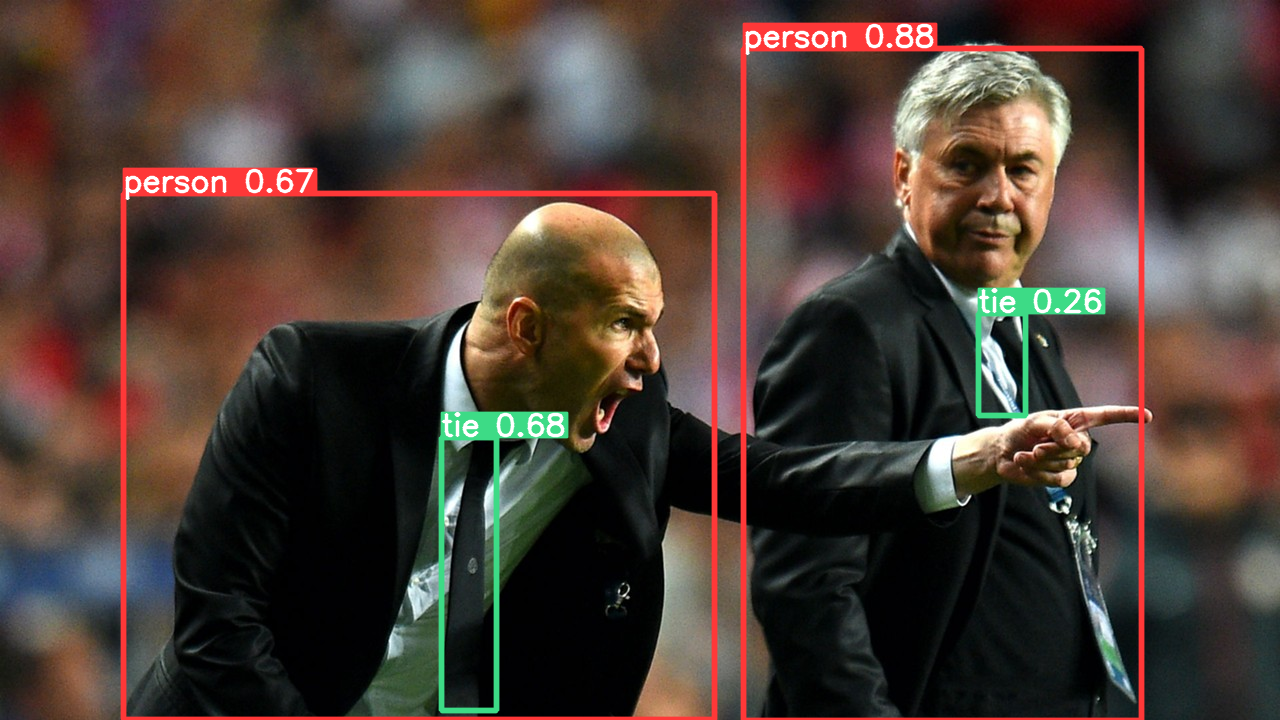

In [15]:
results.show()

In [17]:
np.array(results.render()).shape
# results.render()

(1, 720, 1280, 3)

In [22]:
img = 'cars traffic.jfif'

In [23]:
results = model(img)
results.print()

image 1/1: 183x275 1 person, 11 cars, 5 buss, 10 trucks
Speed: 317.0ms pre-process, 2043.0ms inference, 52.0ms NMS per image at shape (1, 3, 448, 640)


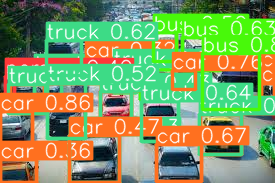

In [25]:
results.show()

In [5]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [31]:
cap = cv2.VideoCapture('Traffic - 27260.mp4')
while True:
    success,img = cap.read()
    # Make detections 
    results = model(img)
    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

**Training our Drowsiness Model**

In [2]:
import uuid
import os
import time

In [6]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ['Awake', 'Drowsy']
number_imgs = 20

In [39]:
cap = cv2.VideoCapture(0)
# Loop through Labels 
for label in labels:
    print("Collecting Images for {}".format(label))
    time.sleep(5)
    # Loop through Image range
    for img_num in range(number_imgs):
        print('Collecting Images for {}, image number {}'.format(label, img_num))
        # cam feed
        ret, frame = cap.read()
        # name img path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        # write img to file
        cv2.imwrite(imgname , frame)
        # render img viz
        cv2.imshow('Image Collection', frame)
        # time delay
        time.sleep(3)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
# Loop through Labels 
for label in labels:
    print("Collecting Images for {}".format(label))
    time.sleep(5)
    # Loop through Image range
    for img_num in range(number_imgs):
        print('Collecting Images for {}, image number {}'.format(label, img_num))
        
        ret, frame = cap.read()
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)

In [ ]:
!git clone https://github.com/tzutalin/labelImg

**Training our Custom Model**

In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2
# I used the windows command prompt in training 
# so you can just run the commands in a cmd terminal
# If on cpu use lower number of epochs less than 100 as it takes a longer time

**Load Custom Model**

In [14]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\LENOVO/.cache\torch\hub\master.zip
requirements: YOLOv5 requirements "tqdm>=4.64.0" "psutil" not found, attempting AutoUpdate...

requirements: 2 packages updated per C:\Users\LENOVO\.cache\torch\hub\ultralytics_yolov5_master\requirements.txt
requirements:  Restart runtime or rerun command for updates to take effect

YOLOv5  2022-11-3 Python-3.7.7 torch-1.7.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients
Adding AutoShape... 


In [43]:
img = os.path.join('data', 'images', 'Awake.3a6d4646-5b68-11ed-bc50-68f72886fc79.jpg')

In [97]:
results = model(img)

In [98]:
results.print()

image 1/1: 480x640 1 Awake
Speed: 284.3ms pre-process, 982.5ms inference, 323.0ms NMS per image at shape (1, 3, 480, 640)


In [92]:
classes = [ 
    'dog','person','cat','tv','car','meatballs','marinara sauce','tomato soup','chicken noodle soup',
'french onion soup','chicken breast','ribs','pulled pork','hamburger','cavity','Awake','Drowsy'
]

In [101]:
# Get label index and bounding box coordinates
labels, cord_thres = results.xyxyn[0][:, -1].numpy(), results.xyxyn[0][:, :-1].numpy()
print(classes[int(labels[0])])
labels[0]

Awake


15.0

In [89]:
# Get labels and bounding box coordinates in pandas format
df = results.pandas().xyxy[0]
y = df['name'].values[0]

str

In [90]:
count = 0
if y=='Awake':
    count+=1
    print(count)

1


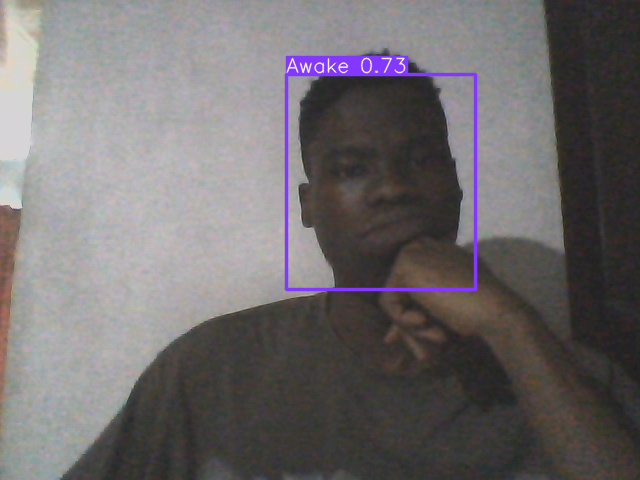

In [18]:
results.show()

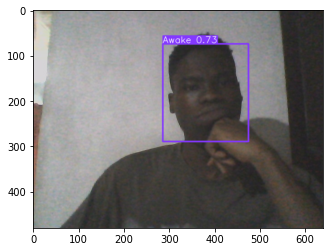

In [19]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [103]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

**Taking Screenshots and Detecting**

I had the idea of taking screenshots during a video stream and using it to create an alarm system but was scrapped, might still work on it later 

In [24]:
SCRSHT_PATH = os.path.join('alarm', 'screenshots')
scrsht_imgs = 10

In [ ]:
count = 0
# time.sleep(5)
cap = cv2.VideoCapture(0) 
time.sleep(5)
# Loop through Image range
for img_num in range(scrsht_imgs):
    ret, frame = cap.read()
    # name img path
    imgname = os.path.join(SCRSHT_PATH, '.'+str(uuid.uuid1())+'.jpg')
    # write img to file
    cv2.imwrite(imgname , frame)
    print('Screenshot Collected')
    # Image prediction
    img = os.path.join(str(imgname))
    results = model(img)    
    print(results.print)
    
    # render img viz
    # cv2.imshow('Image Collection', frame)
    # time delay
    time.sleep(6)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

**Using a Counter for the Alarm system**